# Nonlinear Relationships

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = boston_data.target

In [5]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None)
df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

## Brief Introduction to Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
X = df[['LSTAT']].values

In [8]:
tree = DecisionTreeRegressor(max_depth=5)

In [9]:
tree.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [10]:
sort_idx = X.flatten().argsort()

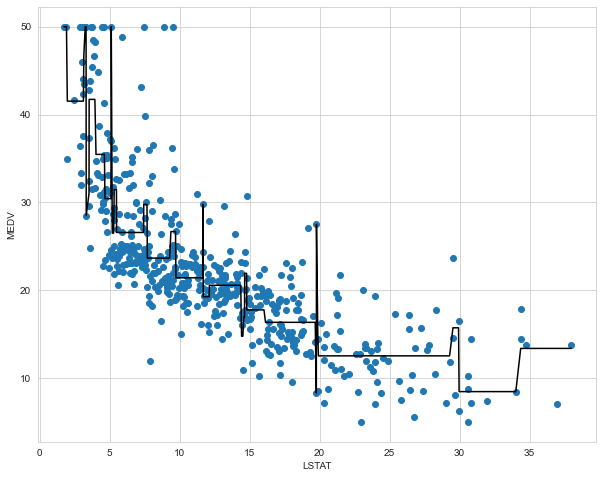

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

***

Using `max_depth` of 5 led to overfitting. Let's try 2 instead.

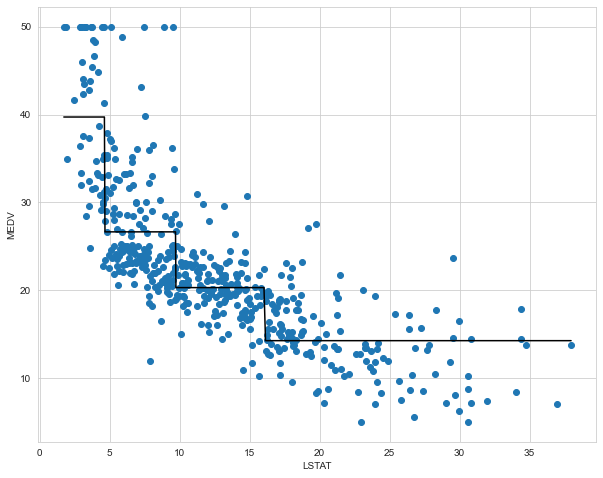

In [12]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

# Brief Introduction to Random Forest

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = df.values
#y = df['MEDV'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                               random_state=42, n_jobs=-1)

In [18]:
forest.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', n_estimators=500, n_jobs=-1,
                      random_state=42)

In [19]:
y_train_pred = forest.predict(X_train)

In [20]:
y_test_pred = forest.predict(X_test)

In [21]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 0.0088, test: 0.0228


In [22]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9999, test: 0.9997


# Brief Introduction to AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostRegressor

In [24]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)

In [25]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=500, random_state=42)

In [26]:
y_train_pred = ada.predict(X_train)

In [27]:
y_test_pred = ada.predict(X_test)

In [28]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 0.0364, test: 0.0607


In [29]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9996, test: 0.9992


***

# Revisiting Feature Importance

## According to AdaBoost

In [30]:
ada.feature_importances_

array([2.17109323e-04, 0.00000000e+00, 4.42849647e-06, 8.15142928e-07,
       3.14615224e-05, 4.41286727e-05, 2.59999474e-05, 2.42078914e-05,
       2.07465496e-05, 2.89331800e-05, 3.52062791e-05, 4.14975482e-05,
       1.00187074e-05, 9.99515447e-01])

In [31]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [32]:
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

In [33]:
result.sort_values(by='feature', ascending=False)

,feature
MEDV,9.995154e-01
CRIM,2.171093e-04
RM,4.412867e-05
B,4.149755e-05
PTRATIO,3.520628e-05
NOX,3.146152e-05
TAX,2.893318e-05
AGE,2.599995e-05
DIS,2.420789e-05
RAD,2.074655e-05


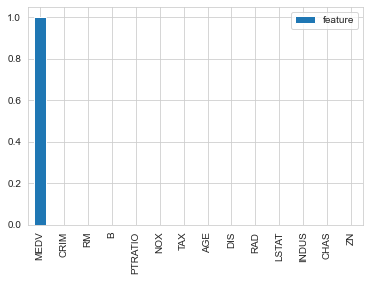

In [34]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

***

## According to Random Forest

In [35]:
forest.feature_importances_

array([1.49326630e-04, 1.93347189e-05, 3.58686932e-05, 7.81142182e-06,
       5.04387509e-05, 7.53382039e-05, 8.61832830e-05, 9.75732634e-05,
       3.71694712e-05, 6.87007544e-05, 3.85254704e-05, 1.05085837e-04,
       6.90972179e-05, 9.99159546e-01])

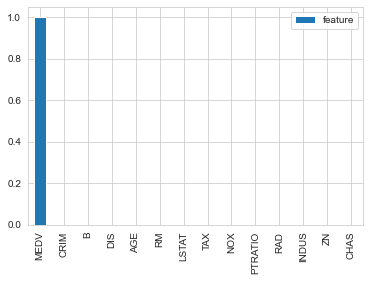

In [36]:
result = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');

***

# Exercise

In [37]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [38]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 2.0650, test: 2.0990


In [39]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9765, test: 0.9718


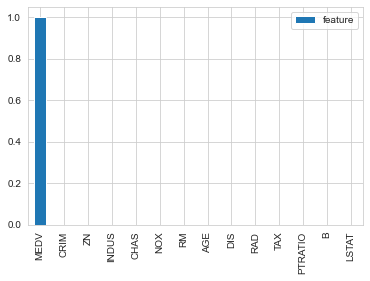

In [40]:
result = pd.DataFrame(tree.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');

***